In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
prom_train_upsampled = pd.read_csv('train_dataframe2.csv')
prom_train_upsampled.head(4)

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers,Promoted_or_Not
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.251740,0.0,0.0,0.0,0.588204,0.508022,0.000000,0.0
1,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.470029,1.0,0.0,0.0,0.456773,0.320476,0.000000,0.0
2,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.273692,1.0,0.0,0.0,0.564934,0.470332,0.000000,0.0
3,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.273692,1.0,0.0,0.0,0.669692,0.572747,0.166667,0.0


In [5]:
prom_train_upsampled.shape

(70142, 35)

In [6]:
# Split-out validation dataset
array = prom_train_upsampled.values
df_HR = array[:,0:34].astype(float)
target = array[:,34]
X_train, X_test, y_train, y_test = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (52606, 34)
Number transactions y_train dataset:  (52606,)
Number transactions X_test dataset:  (17536, 34)
Number transactions y_test dataset:  (17536,)


In [7]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [10]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [11]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,99.98,0.02,98.79,0.16
4,Decision Tree Classifier,95.18,0.25,95.19,0.26
3,KNN,94.41,0.25,87.78,0.48
2,SVM,80.58,0.66,71.69,0.87
0,Logistic Regression,79.91,0.61,71.54,0.50
5,Gaussian NB,76.00,0.73,65.77,0.67


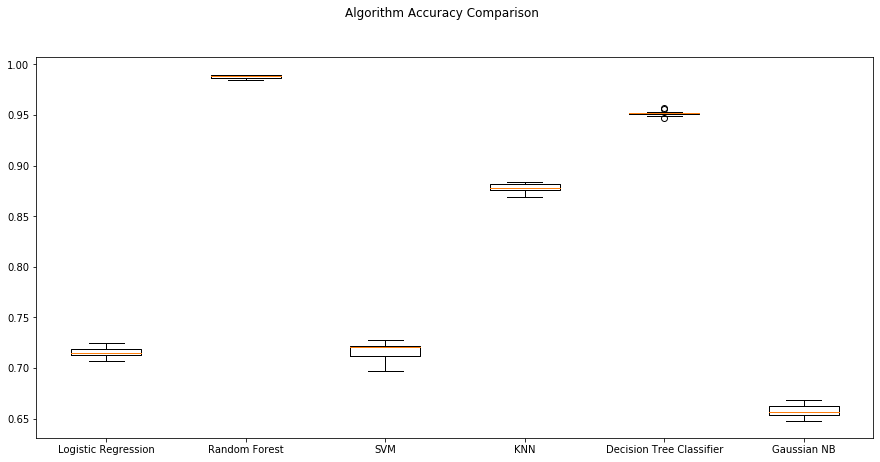

In [12]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

In [13]:

rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=175, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)
best params: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175}
best score: 0.9998390880104785


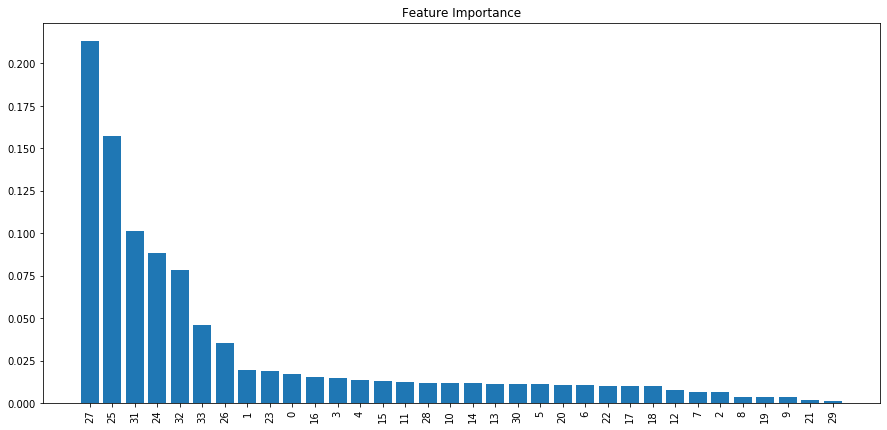

In [15]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
X_train = pd.DataFrame(X_train)
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [16]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(34):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,27.0,0.213419
1,25.0,0.157067
2,31.0,0.101262
3,24.0,0.088451
4,32.0,0.078294
5,33.0,0.046224
6,26.0,0.035099
7,1.0,0.019613
8,23.0,0.018950
9,0.0,0.017119


Text(0.5, 257.44, 'Predicted label')

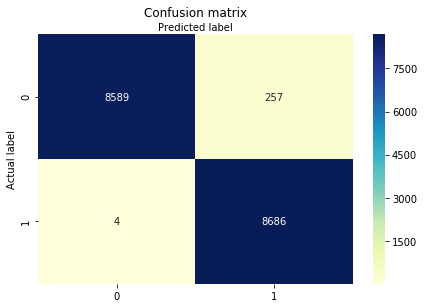

In [17]:

## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 98.51


In [19]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      8846
         1.0       0.97      1.00      0.99      8690

    accuracy                           0.99     17536
   macro avg       0.99      0.99      0.99     17536
weighted avg       0.99      0.99      0.99     17536



In [20]:
from pickle import dump
from pickle import load
# prepare the model
filename = 'finalized_model.sav'
dump(rf_opt, open(filename, 'wb'))

In [41]:
import pandas as pd
prom_tested = pd.read_csv('Newtest_dataframe.csv')
prom_tested.head(3)

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers
0,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.6,0.0,0.0,0.744125,1.0,0.0,0.0,0.801878,0.159042,0.166667
1,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.792796,1.0,0.0,0.0,0.473326,0.000000,0.166667
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6,0.0,0.0,0.868480,1.0,0.0,0.0,0.657710,0.491797,0.166667


In [67]:
# X_test
array = prom_tested.values
X_test1 = array[:,0:34].astype(float)

In [68]:
#prediction_test = rf_opt.predict(X_test1)
#print(prediction_test)

In [69]:
# load the model from disk
#loaded_model2 = load(open(filename, 'rb'))
# estimate accuracy on validation dataset
#scaler = StandardScaler().fit(X_test1)
#rescaledValidationXt = scaler.transform(X_test1)

# binarization
#from sklearn.preprocessing import Binarizer
#binarizer = Binarizer(threshold=0.0).fit(X_test1)
#binaryX = binarizer.transform(X_test1)

# load the model from disk
loaded_model = load(open(filename, 'rb'))

#prediction_test = loaded_model.predict(rescaledValidationXt)
prediction_test = loaded_model.predict(X_test1)
print(prediction_test)

[0. 0. 0. ... 1. 0. 0.]


In [70]:
prom_test = pd.read_csv('test.csv', index_col=None)
employee_id = prom_test['EmployeeNo']
Promotion = pd.DataFrame(prediction_test).astype('int')
#concat two dataframes for better visualization 
#colnames = ['EmployeeNo', 'Promotion']
model_predict = pd.concat([employee_id, Promotion],axis=1, ignore_index=True)
model_predict.columns = ['EmployeeNo', 'Promoted_or_Not']  #naming the dataframe columns
model_predict.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [71]:
#The data is exported for use in the exploration and clustering section
model_predict.to_csv (r'C:\Users\OLUMEGBON ISMAIL\Desktop\Jupyter\ismail_kaggle28.csv', index = None, header=True)